# Analysis / Plotting - Notebook 03 - p_GTP_exchange
Author: Bettina Vignolo

This notebook was created to perform several smaller experiments with the microtubule model and analyze the results. It focuses on ```p_GTP_exchange``` and how this parameter influences MT length

In [1]:
# load Packages:
using Agents
using Statistics
using DataFrames
using Distributions
using StatsBase
using DrWatson: @dict
using Serialization
using InteractiveDynamics
using GLMakie
import ColorSchemes as co
using DataFramesMeta

# load Functions:
include("01_Agent.jl")
include("02_Initialization.jl")
include("03_AgentStep.jl")
include("04_ModelStep.jl")
include("05_Analysis.jl")

MT_size_each (generic function with 1 method)

In [2]:
using Distributed
addprocs(4)

@everywhere begin
    # load Packages:
    using Agents
    using Statistics
    using DataFrames
    using Distributions
    using StatsBase
    using DrWatson: @dict
    using Serialization
    using InteractiveDynamics
    using GLMakie
    import ColorSchemes as co
    using DataFramesMeta

    # load Functions:
    include("01_Agent.jl")
    include("02_Initialization.jl")
    include("03_AgentStep.jl")
    include("04_ModelStep.jl")
    include("05_Analysis.jl")
end    

## 1. Scanning for ideal range


### 1.1 First try with 10 different p_hyd

In [2]:
parameters=Dict(
            :griddims => (100,100),
            :periodic => true,
            :Nstarts => 5,
            :numagents => 1000, 
            :p_hyd => 0.024,  #chosen on Analysis 02 basis               
            :p_polym=> 1 ,    
            :p_depolym_GTP => 0,
            :p_depolym_GDP => 0.5, #chosen on Analysis 01 basis  
            :p_GTP_exchange => collect([0:0.1:1]...)) #11 verschiedene Wahrscheinlichkeiten 
# Model Data:
mdata = [mean_MT_size]
# Run Model 
_ , paramdata = paramscan(parameters, initialize; mdata, agent_step!, model_step!, n=10000)
serialize("data/paramscan_p_GTP_exchange_10kSteps.jls", paramdata)

Progress: 100%|█████████████████████████████████████████| Time: 0:01:38


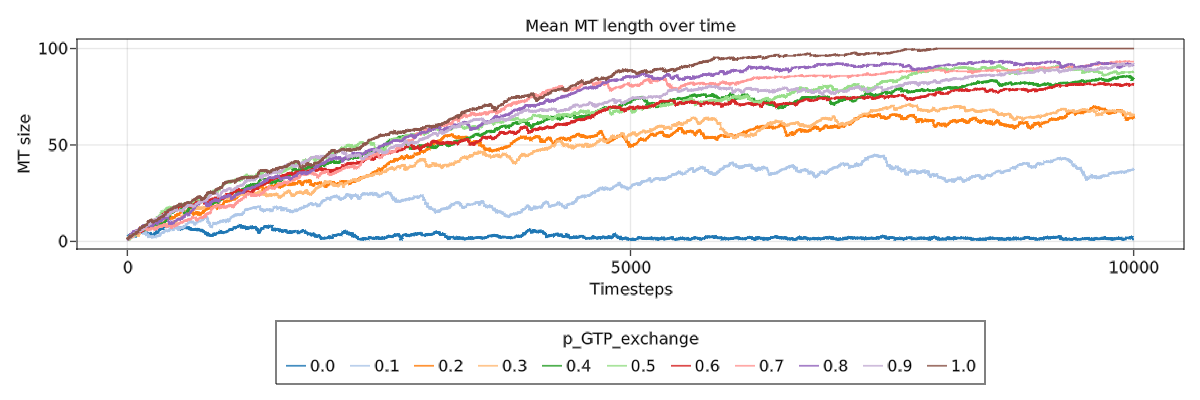

In [7]:
data1 = deserialize("data/paramscan_p_GTP_exchange_10kSteps.jls") #110.011 rows
f1 = Figure(resolution =(1200, 400))
ax1 = Axis(f1[1,1]; xlabel = "Timesteps", ylabel = "MT size", title = "Mean MT length over time")
range = collect(0:0.1:1)

for (i,v) in enumerate(range)
    sub_data = @subset(data1, :p_GTP_exchange .== v)
    lines!(ax1, sub_data.step, sub_data.mean_MT_size, label = "$v", color = co.tab20[i])
end


Legend(f1[2,1], ax1, "p_GTP_exchange", orientation = :horizontal, tellwidth = false, tellheight = true)

f1

### 1.2 Repeat but range between 0.01 and 0.1 and 100k steps
range = collect(0.01:0.01:0.1)

In [16]:
parameters=Dict(
            :griddims => (100,100),
            :periodic => true,
            :Nstarts => 5,
            :numagents => 1000, 
            :p_hyd =>  0.024,  #chosen on "Analysis 02" basis                  
            :p_polym=> 1 ,    
            :p_depolym_GTP => 0,
            :p_depolym_GDP => 0.5, 
            :p_GTP_exchange => collect([0.01:0.01:0.1]...) #10 verschiedene Wahrscheinlichkeiten 
    )
# Model Data:
mdata = [mean_MT_size]
# Run Model 
_ , paramdata = paramscan(parameters, initialize; mdata, agent_step!, model_step!, n=100000)
serialize("data/paramscan_small_p_GTP_exchange_100kSteps.jls", paramdata)

Progress: 100%|█████████████████████████████████████████| Time: 0:13:40


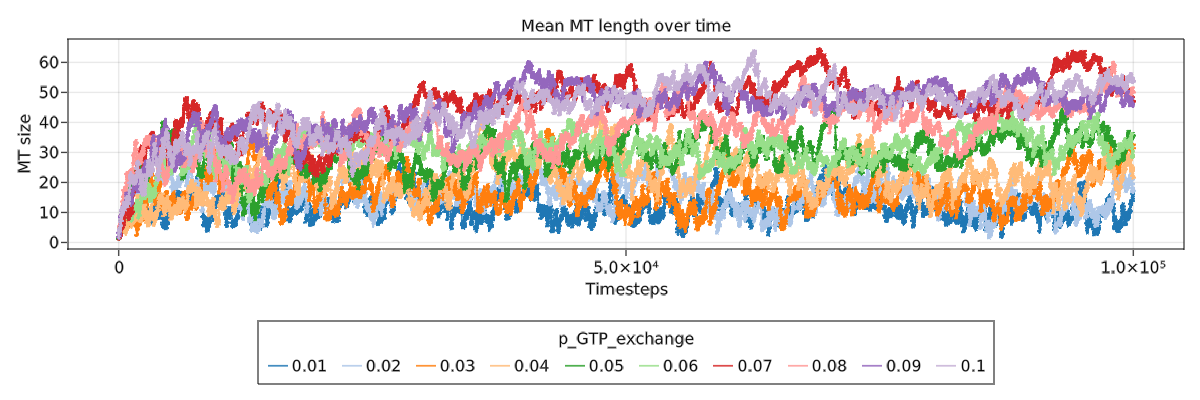

In [19]:
data1_2 = deserialize("data/paramscan_small_p_GTP_exchange_10kSteps.jls"); #110.011 rows
f1_2 = Figure(resolution =(1200, 400))
ax1_2 = Axis(f1_2[1,1]; xlabel = "Timesteps", ylabel = "MT size", title = "Mean MT length over time")
range = collect(0.01:0.01:0.1)

for (i,v) in enumerate(range)
    sub_data = @subset(data1_2, :p_GTP_exchange .== v)
    lines!(ax1_2, sub_data.step, sub_data.mean_MT_size, label = "$v", color = co.tab20[i])
end


Legend(f1_2[2,1], ax1_2, "p_GTP_exchange", orientation = :horizontal, tellwidth = false, tellheight = true)

f1_2

### 1.3 Repeat but range between 0.0 and 1 with irregular steps


In [22]:
parameters=Dict(
            :griddims => (100,100),
            :periodic => true,
            :Nstarts => 5,
            :numagents => 1000, 
            :p_hyd =>  0.024,  #chosen on "Analysis 02" basis                  
            :p_polym=> 1 ,    
            :p_depolym_GTP => 0,
            :p_depolym_GDP => 0.5, 
            :p_GTP_exchange => [0, 0.025, 0.05, 0.75, 0.1, 0.15, 0.2, 0.4, 0.6, 1.0] #10 verschiedene Wahrscheinlichkeiten 
    )
# Model Data:
mdata = [mean_MT_size]
# Run Model 
_ , paramdata = paramscan(parameters, initialize; mdata, agent_step!, model_step!, n=10000)
serialize("data/paramscan_diff_p_GTP_exchange_10kSteps.jls", paramdata)

Progress: 100%|█████████████████████████████████████████| Time: 0:01:22


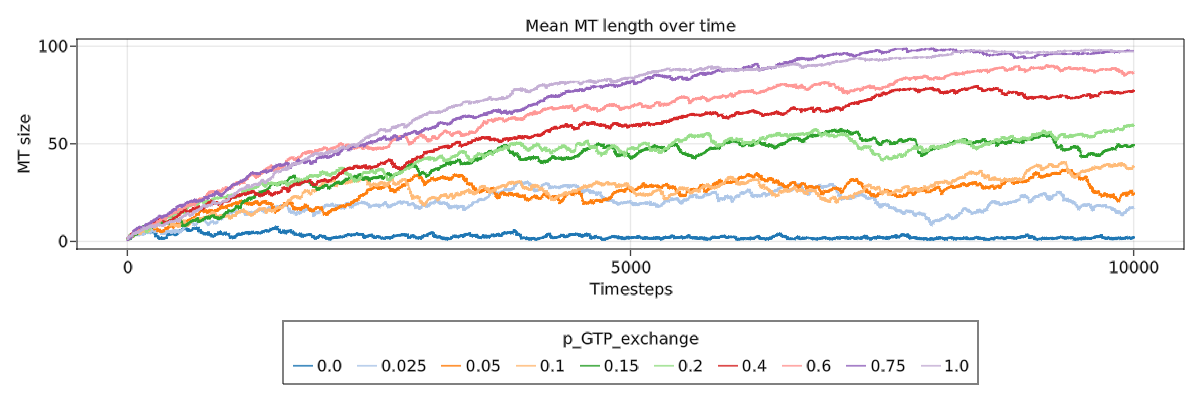

In [3]:
data1_3 = deserialize("data/paramscan_diff_p_GTP_exchange_10kSteps.jls") #110.011 rows
f1_3 = Figure(resolution =(1200, 400))
ax1_3 = Axis(f1_3[1,1]; xlabel = "Timesteps", ylabel = "MT size", title = "Mean MT length over time")
range = [0, 0.025, 0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.75, 1.0]

for (i,v) in enumerate(range)
    sub_data = @subset(data1_3, :p_GTP_exchange .== v)
    lines!(ax1_3, sub_data.step, sub_data.mean_MT_size, label = "$v", color = co.tab20[i])
end


Legend(f1_3[2,1], ax1_3, "p_GTP_exchange", orientation = :horizontal, tellwidth = false, tellheight = true)

f1_3

Combining data from 1 and 1.3 

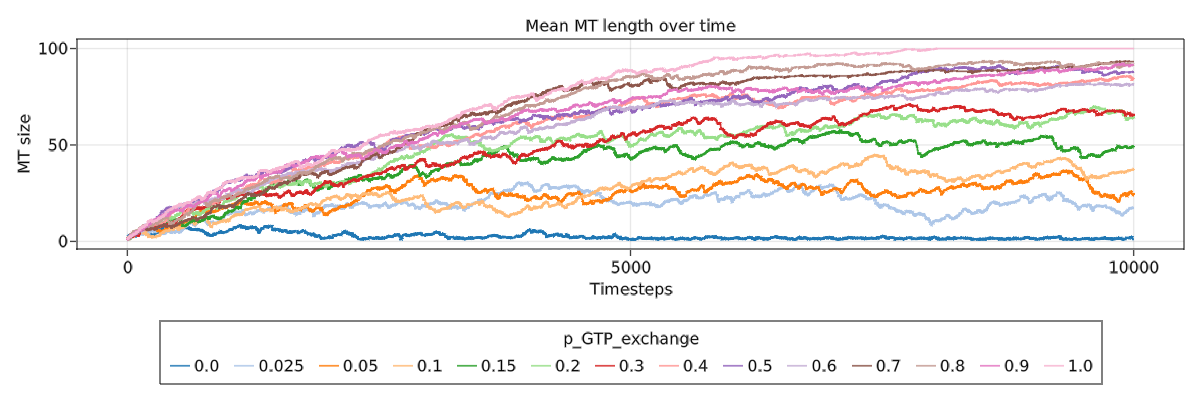

In [23]:
df_1_3 = append!(data1, @subset(data1_3, :p_GTP_exchange .∉ [0:0.1:1]))
f1_3_1 = Figure(resolution =(1200, 400))
ax1_3_1 = Axis(f1_3_1[1,1]; xlabel = "Timesteps", ylabel = "MT size", title = "Mean MT length over time")
range = [0, 0.025, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for (i,v) in enumerate(range)
    sub_data = @subset(df_1_3, :p_GTP_exchange .== v)
    lines!(ax1_3_1, sub_data.step, sub_data.mean_MT_size, label = "$v", color = co.tab20[i])
end

Legend(f1_3_1[2,1], ax1_3_1, "p_GTP_exchange", orientation = :horizontal, tellwidth = false, tellheight = true)

f1_3_1

### 1.4 Repeat 1.1 range but for many steps

In [8]:
parameters=Dict(
            :griddims => (100,100),
            :periodic => true,
            :Nstarts => 5,
            :numagents => 1000, 
            :p_hyd => 0.024,  #chosen on Analysis 02 basis               
            :p_polym=> 1 ,    
            :p_depolym_GTP => 0,
            :p_depolym_GDP => 0.5, #chosen on Analysis 01 basis  
            :p_GTP_exchange => collect([0:0.1:1]...) #11 verschiedene Wahrscheinlichkeiten 
    )
# Model Data:
mdata = [mean_MT_size]
# Run Model 
_ , paramdata = paramscan(parameters, initialize; mdata, agent_step!, model_step!, n=100000)
serialize("data/paramscan_p_GTP_exchange_100kSteps.jls", paramdata)

Progress: 100%|█████████████████████████████████████████| Time: 0:14:47


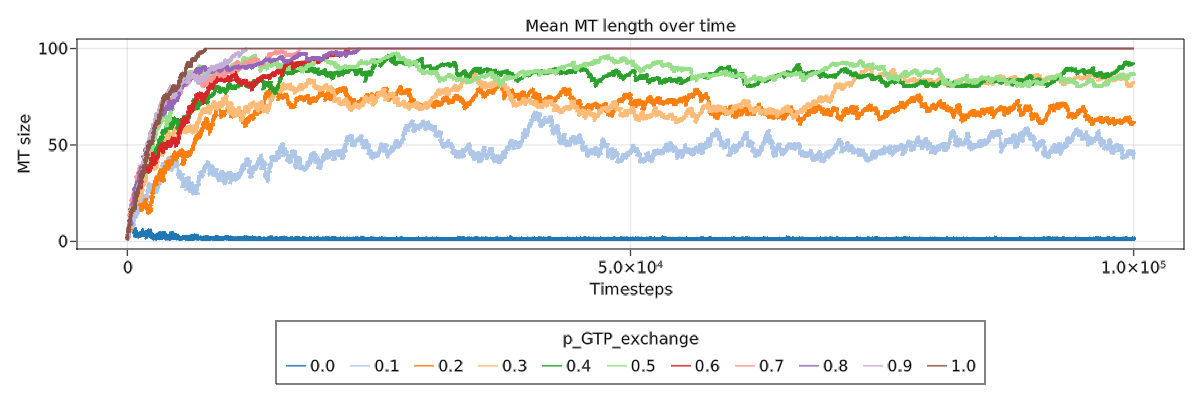

In [11]:
data1_4 = deserialize("data/paramscan_p_GTP_exchange_100kSteps.jls"); #110.011 rows
f1_4 = Figure(resolution =(1200, 400))
ax1_4 = Axis(f1_4[1,1]; xlabel = "Timesteps", ylabel = "MT size", title = "Mean MT length over time")
range = collect(0:0.1:1)

for (i,v) in enumerate(range)
    sub_data = @subset(data1_4, :p_GTP_exchange .== v)
    lines!(ax1_4, sub_data.step, sub_data.mean_MT_size, label = "$v", color = co.tab20[i])
end

Legend(f1_4[2,1], ax1_4, "p_GTP_exchange", orientation = :horizontal, tellwidth = false, tellheight = true)

f1_4

combine with data from 1.2

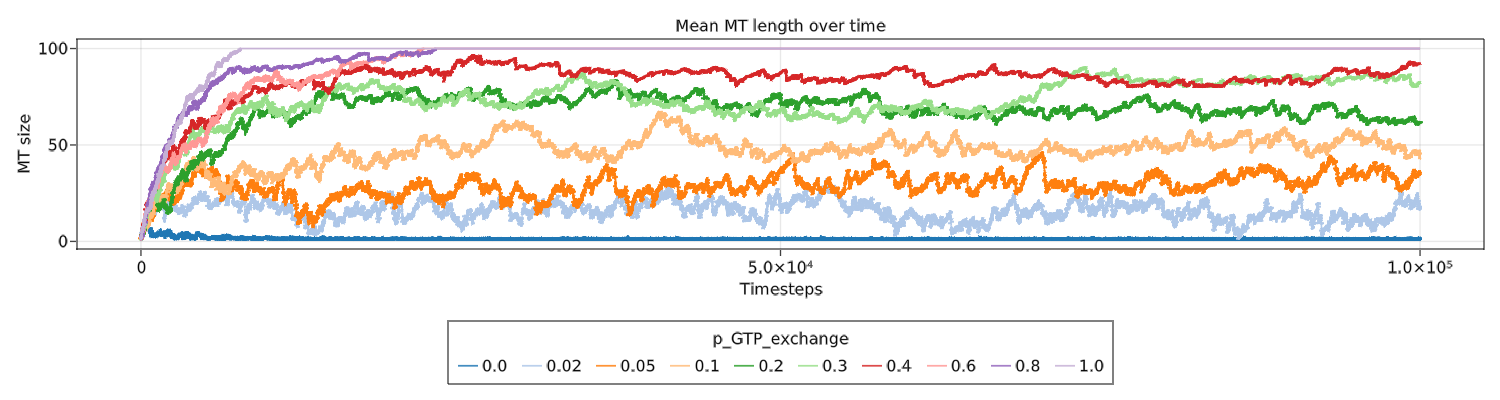

In [36]:
data1_4_2 = append!(data1_4, @subset(data1_2, :p_GTP_exchange .!= 0.1))
f1_4_2 = Figure(resolution =(1500, 400))
ax1_4_2 = Axis(f1_4_2[1,1]; xlabel = "Timesteps", ylabel = "MT size", title = "Mean MT length over time")
range = [0.0, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1.0]

for (i,v) in enumerate(range)
    sub_data = @subset(data1_4_2, :p_GTP_exchange .== v)
    lines!(ax1_4_2, sub_data.step, sub_data.mean_MT_size, label = "$v", color = co.tab20[i])
end

Legend(f1_4_2[2,1], ax1_4_2, "p_GTP_exchange", orientation = :horizontal, tellwidth = false, tellheight = true)

f1_4_2

### 1.5 Repeat 1.3 but with 10 ensembles

In [6]:
models = [initialize(;
        Nstarts = 5,
        periodic = true,
        numagents = 1000,
        griddims = (100,100), 
        p_polym = 1,
        p_hyd = 0.024,
        p_GTP_exchange = x,
        p_depolym_GTP = 0,
        p_depolym_GDP = 0.5)  
    for x in repeat([0, 0.025, 0.05, 0.75, 0.1, 0.15, 0.2, 0.4, 0.6, 1.0], 10)]
# Run ensemble of models for 10000 timesteps and collect data:
mdata = [mean_MT_size, (:p_GTP_exchange)]
data_ens = ensemblerun!(models, agent_step!, model_step!, 10000; mdata)
serialize("data/paramscan_10ensemble_p_GTP_exchange.jls", data_ens[2])

In [8]:
data1_5 = deserialize("data/paramscan_10ensemble_p_GTP_exchange.jls")
gdf = groupby(data1_5, [:step, :p_GTP_exchange])
summary_df = combine(gdf, [:mean_MT_size] .=> [mean]);

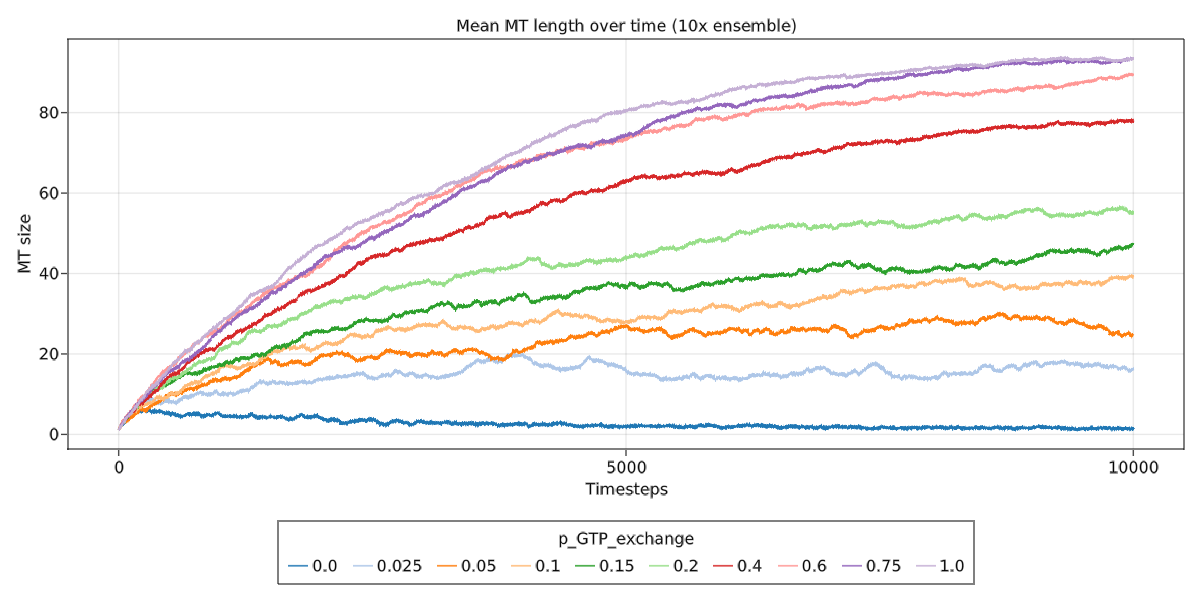

In [10]:
f1_5 = Figure(resolution =(1200, 600))
ax1_5 = Axis(f1_5[1,1]; xlabel = "Timesteps", ylabel = "MT size", title = "Mean MT length over time (10x ensemble)")
range = [0, 0.025, 0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.75, 1.0]

for (i,v) in enumerate(range)
    sub_data = @subset(summary_df, :p_GTP_exchange .== v)
    lines!(ax1_5, sub_data.step, sub_data.mean_MT_size_mean, label = "$v", color = co.tab20[i])
end

Legend(f1_5[2,1], ax1_5, "p_GTP_exchange", orientation = :horizontal, tellwidth = false, tellheight = true)

f1_5

### 1.6 Repeat 1.5 but 10x longer
runtime aprox. 150min

In [3]:
@everywhere begin
    models = [initialize(;
            Nstarts = 5,
            periodic = true,
            numagents = 1000,
            griddims = (100,100), 
            p_polym = 1.0,
            p_hyd = 0.024,
            p_GTP_exchange = x,
            p_depolym_GTP = 0.0,
            p_depolym_GDP = 0.5)  
        for x in repeat([0.0, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.4, 0.6, 1.0], 10)]

    mdata = [mean_MT_size, (:p_GTP_exchange)]
end
data_ens = ensemblerun!(models, agent_step!, model_step!, 100000; mdata)
serialize("data/paramscan_10ensemble_p_GTP_exchange_100kSteps.jls", data_ens[2])

In [3]:
#repeat experiment for p_GTP_exchange = 0.01
@everywhere begin
    models = [initialize(;
            Nstarts = 5,
            periodic = true,
            numagents = 1000,
            griddims = (100,100), 
            p_polym = 1.0,
            p_hyd = 0.024,
            p_GTP_exchange = x,
            p_depolym_GTP = 0.0,
            p_depolym_GDP = 0.5)  
        for x in repeat([0.01], 10)]
    mdata = [mean_MT_size, (:p_GTP_exchange)]
end
data_ens = ensemblerun!(models, agent_step!, model_step!, 100000; mdata)
serialize("data/paramscan_10ensemble_p_GTP_exchange_100kSteps_additional_p_0.01.jls", data_ens[2])

In [2]:
#add additional parameter to dataframe and plot everything again
data_add  = deserialize("data/paramscan_10ensemble_p_GTP_exchange_100kSteps_additional_p_0.01.jls");

In [3]:
data1_6 = deserialize("data/paramscan_10ensemble_p_GTP_exchange_100kSteps.jls")
data_all = append!(@subset(data1_6, :ensemble .!= 79, :ensemble .!= 80), data_add)
gdf = groupby(data_all, [:step, :p_GTP_exchange])
sum1_6 = combine(gdf, [:mean_MT_size] .=> [mean]);

In [10]:
@subset(data1_6, :p_GTP_exchange .== 0.6, :step .== 80000); #exclude ensemble 79

In [13]:
@subset(data1_6, :p_GTP_exchange .== 1.0, :step .== 80000); #exclude ensemble 80

In [5]:
#Length over time
f1_6 = Figure(resolution =(1200, 600))
ax1_6 = Axis(f1_6[1,1]; xlabel = "Timesteps", ylabel = "MT size", title = "Mean MT length over time (10x ensemble) - excluded ensembles 79, 80")
range = [0.0, 0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.4, 0.6, 1.0]

for (i,v) in enumerate(range)
    sub_data = @subset(sum1_6, :p_GTP_exchange .== v)
    lines!(ax1_6, sub_data.step, sub_data.mean_MT_size_mean, label = "$v", color = co.tab20[i])
end

Legend(f1_6[2,1], ax1_6, "p_GTP_exchange", orientation = :horizontal, tellwidth = false, tellheight = true)

f1_6

In [8]:
#Mean Length
f2_6 = Figure(resolution = (800, 600)) 
range = [0.0, 0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.4, 0.6, 1.0]

ax2_6 = Axis(f2_6[1,1]; titel = "Avg of MT lengths", xlabel = "p_GTP_exchange", ylabel ="Mean MT length", xticks = LinearTicks(11), yticks = LinearTicks(5), yticklabelcolor = :green,  ylabelcolor = :green)

means = Float64[]
stds = Float64[]
for (i,v) in enumerate(range)
    df_sub = @subset(sum1_6, :step .>= 50000, :p_GTP_exchange .== v)  
    append!(means, mean(df_sub.mean_MT_size_mean))
    append!(stds, std(df_sub.mean_MT_size_mean))
end

l1 = lines!(ax2_6, range, means, color = :green)
l2 = errorbars!(ax2_6, range, means, stds, color = :red, whiskerwidth = 10)

Legend(f2_6[2,1], [l1, l2], ["Mean", "Std"], orientation = :horizontal, tellwidth = false, tellheight = true)

f2_6

In [29]:
#Skewness
f2_7 = Figure(resolution = (1000,400)) 
range = [0.0, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.4, 0.6, 1.0]
ax2_7 = Axis(f2_7[1,1]; ylabel = "Skewness", xlabel = "p_GTP_exchange", xticks = LinearTicks(20))

skews = Float64[]
for (i,v) in enumerate(range)
    df_sub = @subset(sum1_6, :step .>= 50000, :p_GTP_exchange .== v) 
    append!(skews, skewness(df_sub.mean_MT_size_mean))
end
hlines!(ax2_7, 0, color = :red)
lines!(ax2_7, range, skews)

f2_7

In [39]:
#Histogramm
f2_8 = Figure(resolution = (1000, 400)) 
range = [0.0, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.4, 0.6, 1.0]
ax2_8 = Axis(f2_8[1,1]; xlabel = "MT Length", title = "MT Length Distributions for each p_GTP_exchange (beginning at step 50000)")
hideydecorations!(ax2_8)
xlims!(ax2_8, 0, 100)
for (i,v) in enumerate(range)
    df_sub = @subset(sum1_6, :step .>= 50000, :p_GTP_exchange .== v) 
    hist!(ax2_8, df_sub.mean_MT_size_mean; bins = 50, scale_to=2, direction=:y, label = "$v", color = co.tab20[i]) # offset=offsets[i],
end

Legend(f2_8[2,1], ax2_8, "p_GTP_exchange", merge = true, orientation = :horizontal, tellwidth = false, tellheight = true)

f2_8

## 2. Metrics to compare
based on data from 1.5 (10x ensemble)

### 2.1 Histogramm and Skewness

In [38]:
data1_5 = deserialize("data/paramscan_10ensemble_p_GTP_exchange.jls")
gdf = groupby(data1_5, [:step, :p_GTP_exchange])
sum1_5 = combine(gdf, [:mean_MT_size] .=> [mean]);

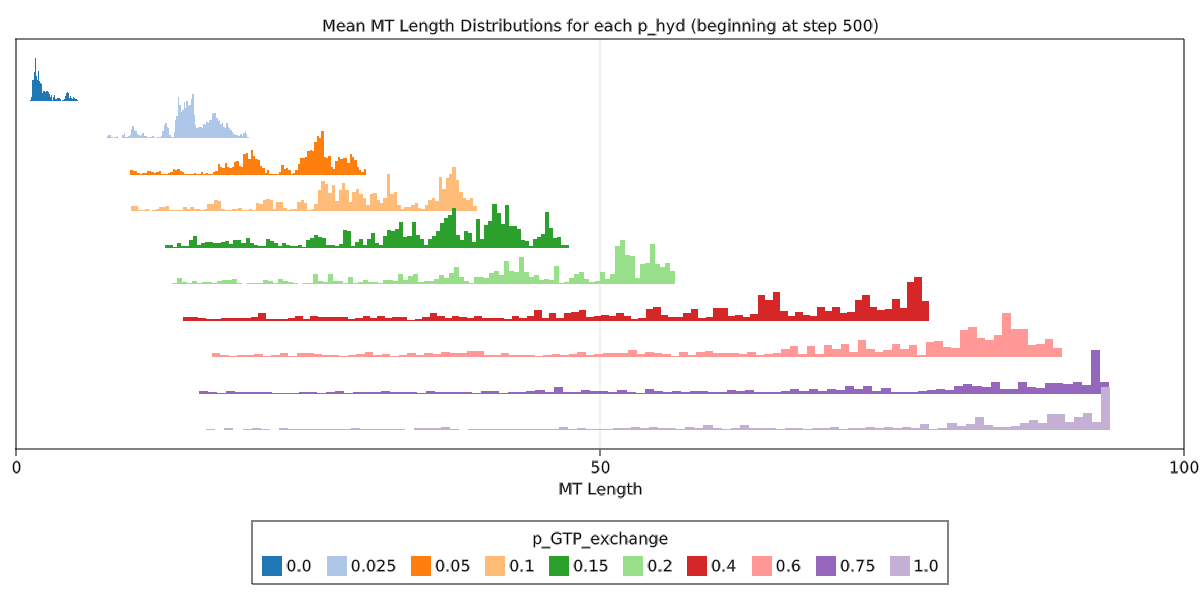

In [58]:
f2_1 = Figure(resolution = (1200, 600)) 
range = [0, 0.025, 0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.75, 1.0]
ax2_1 = Axis(f2_1[1,1]; xlabel = "MT Length", title = "Mean MT Length Distributions for each p_hyd (beginning at step 500)")
hideydecorations!(ax2_1)
xlims!(ax2_1, 0, 100)
offsets = collect(10:-1:1)

for (i,v) in enumerate(range)
    df_sub = @subset(sum1_5, :step .>= 500, :p_GTP_exchange .== v) 
    hist!(ax2_1, df_sub.mean_MT_size_mean; bins = 100, scale_to=1.2, offset=offsets[i], direction=:y, label = "$v", color = co.tab20[i])
    #vlines!(ax2_6, mean(df_sub.mean_MT_size_mean); ymin = v/1.2, ymax = (v+0.1)/1.2,color = :black, linestyle = :dash, label = "mean")
end

Legend(f2_1[2,1], ax2_1, "p_GTP_exchange", merge = true, orientation = :horizontal, tellwidth = false, tellheight = true)

f2_1

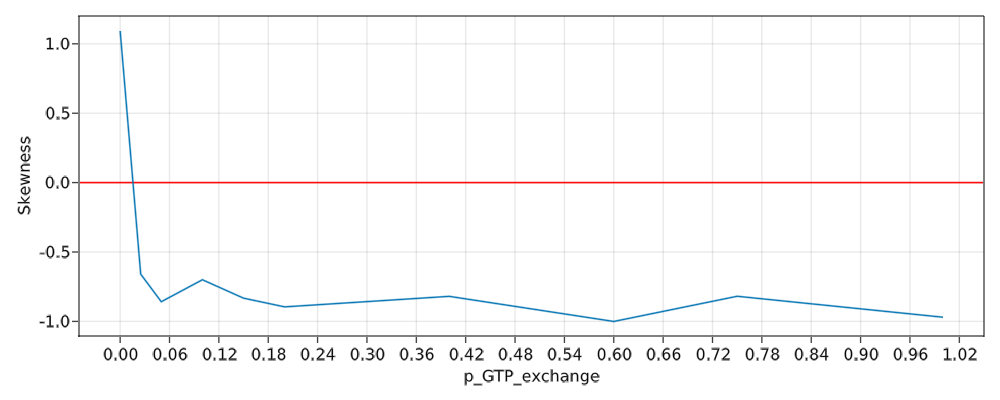

In [60]:
f2_1_2 = Figure(resolution = (1000,400)) 
range = [0, 0.025, 0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.75, 1.0]
ax2_1_2 = Axis(f2_1_2[1,1]; ylabel = "Skewness", xlabel = "p_GTP_exchange", xticks = LinearTicks(20))

skews = Float64[]
for (i,v) in enumerate(range)
    df_sub = @subset(sum1_5, :step .>= 500, :p_GTP_exchange .== v) 
    append!(skews, skewness(df_sub.mean_MT_size_mean))
end
hlines!(ax2_1_2, 0, color = :red)
lines!(ax2_1_2, range, skews)

f2_1_2

### 2.2 Mean, Variance, Std

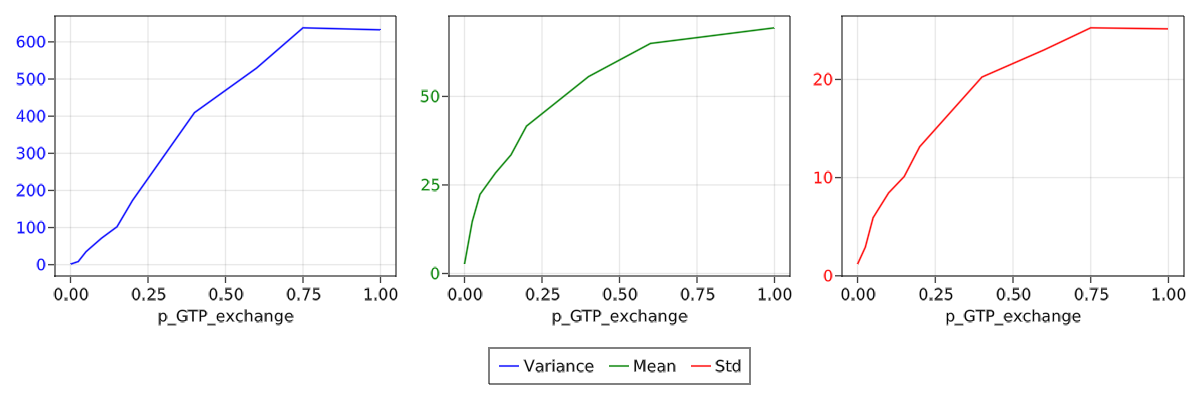

In [63]:
f2_2 = Figure(resolution = (1200, 400)) 
range = [0, 0.025, 0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.75, 1.0]
ax2_2_1 = Axis(f2_2[1,1]; titel = "Variance of MT length distribution", xlabel = "p_GTP_exchange", xticks = LinearTicks(5), yticklabelcolor = :blue, ylabelcolor = :blue)
ax2_2_2 = Axis(f2_2[1,2]; titel = "Avg of MT length distribution", xlabel = "p_GTP_exchange", xticks = LinearTicks(5), yticklabelcolor = :green,  ylabelcolor = :green)
ax2_2_3 = Axis(f2_2[1,3]; titel = "Std of MT length distribution", xlabel = "p_GTP_exchange", xticks = LinearTicks(5), yticklabelcolor = :red, ylabelcolor = :red)

vars = Float64[]
means = Float64[]
stds = Float64[]
for (i,v) in enumerate(range)
    df_sub = @subset(sum1_5, :p_GTP_exchange .== v) #:step .>= 500,
    append!(vars, var(df_sub.mean_MT_size_mean))
    append!(means, mean(df_sub.mean_MT_size_mean))
    append!(stds, std(df_sub.mean_MT_size_mean))
end

l1 = lines!(ax2_2_1, range, vars, color = :blue)
l2 = lines!(ax2_2_2, range, means, color = :green)
l3 = lines!(ax2_2_3, range, stds, color = :red)

Legend(f2_2[2,2], [l1, l2, l3], ["Variance", "Mean", "Std"], orientation = :horizontal, tellwidth = false, tellheight = true)

f2_2

### 2.3 Growth Rate

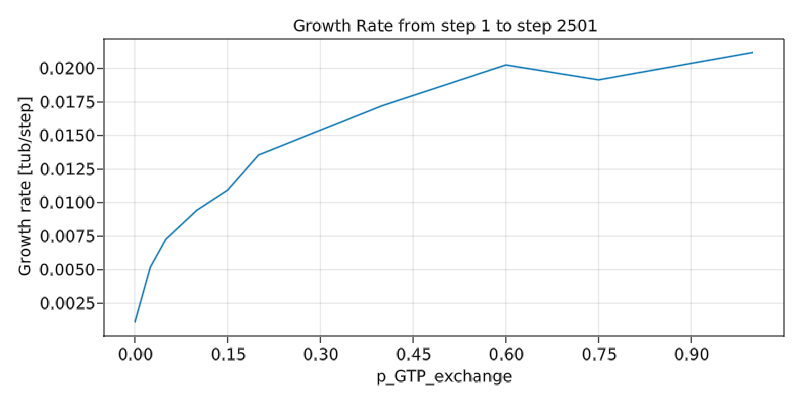

In [70]:
start = 1
finish = 2501

f2_3 = Figure(resolution = (800,400)) 
range = [0, 0.025, 0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.75, 1.0]
ax2_3 = Axis(f2_3[1,1]; ylabel = "Growth rate [tub/step]", xlabel = "p_GTP_exchange", xticks = LinearTicks(10), yticks = LinearTicks(10), title = "Growth Rate from step $start to step $finish")


rates = Float64[]
for (i,v) in enumerate(range)
    df_sub = @subset(sum1_5, :p_GTP_exchange .== v) 
    append!(rates, (df_sub.mean_MT_size_mean[finish] - df_sub.mean_MT_size_mean[start])/(finish-start))
end

lines!(ax2_3, range, rates)

f2_3  